# El tratamiento de variables categoricas

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")

In [4]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


Este ser aun analisis BigData como el de las empresas financeiras que nos comparan con personas dentro de nuestro rango de edad e ingresos.

las varaibles Gender y City Tier son **categoricas**, vamos a crear para cada una varaibles Dummy

In [5]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City")
#esto dara una columna para cada valor y las llenara con 0´s y 1´s si aplica o no

In [6]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [7]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


Ahora debemos **hacer un Join con el dataset principal**

In [8]:
column_names = df.columns.values.tolist() #tomo los nombres de las columnas y los guardo en una lista (array)
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [9]:
df_new = df[column_names].join(dummy_gender)#uno las columnas actuales con los datos dummy de genero
colum_names = df_new.columns.values.tolist()#guardo los nuevos nombres de columnas
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


Ahora agregamos el valor de City

In [10]:
df_new = df_new[colum_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


Lo siguiente es ver como integrar estos valores al modelo y como acceder a sus respectivos coeficientes. Vamos a obtener solo lo que necesitamos

In [11]:
feature_cols = ['Monthly Income','Transaction Time', 'Gender_Female', 
                'Gender_Male', 'City_Tier 1', 
                'City_Tier 2', 'City_Tier 3', 'Record'] #seran variables predictorias, 
#luego del primer intento se añadieron: 

In [12]:
X = df_new[feature_cols]#varaibles predictorias en x
Y = df_new["Total Spend"]#variable a predecir

creamos el modelo

In [13]:
lm = LinearRegression()#cargo objeto en la variable
lm.fit(X,Y)#inicio entrenamiento

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lm.intercept_

-79.4171303013718

In [15]:
lm.coef_

array([ 1.47538980e-01,  1.54946125e-01, -1.31025013e+02,  1.31025013e+02,
        7.67643260e+01,  5.51389743e+01, -1.31903300e+02,  7.72233446e+02])

In [16]:
list(zip(feature_cols, lm.coef_))
#Gender Female y Gender male tienen los mismos valores (positivo y negativo)
#las City Tier si las sumamos dan 0

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589615),
 ('Gender_Female', -131.02501325554607),
 ('Gender_Male', 131.02501325554613),
 ('City_Tier 1', 76.76432601049524),
 ('City_Tier 2', 55.138974309232566),
 ('City_Tier 3', -131.9033003197279),
 ('Record', 772.2334457445644)]

In [17]:
lm.score(X,Y)#R2, ese valor 0.19478920552885381 es muy bajo, a este modelo aqui le falta informacion (sin el valor record)
#luego dio 0.9179923586131016 un R2 muy muy bueno

0.9179923586131016

**Conclusion:** haber añadido "Record" al modelo fue muy muy bueno

El modelo puede ser escrito como: (entre el valor de coef sea mas alto, mejor es la variable)

* Total_Spend = -79.41713030137362 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545+'Gender_Female' -131.02501325554567 + 'Gender_Male' 131.0250132555456+'City_Tier 1' 76.76432601049527 + 'City_Tier 2' 55.138974309232474 + 'City_Tier 3' -131.9033003197278+'Record' 772.2334457445648

    * Si es hombre y vive en CT1: Total_Spend = 128.37220896466724 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545+'Record'* 772.2334457445648
    
    * Si es hombre y vive en CT2: Total_Spend = 106.74685726340445 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545 +'Record'* 772.2334457445648
    
    * Si es hombre y vive en CT3: Total_Spend = -80.29541736555583 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545+'Record'* 772.2334457445648
    
    * Si es mujer y vive en CT1: Total_Spend = -79.41713030137362 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545 - 131.0250132555456+ 76.76432601049527 +'Record'* 772.2334457445648
    
    * Si es mujer y vive en CT2: Total_Spend = -79.41713030137362 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545 - 131.0250132555456+ 55.138974309232474 +'Record'* 772.2334457445648
    
    * Si es mujer y vive en CT3: Total_Spend = -79.41713030137362 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545 - 131.0250132555456-131.9033003197278 +'Record'* 772.2334457445648
    
**Algunos modelos fueron simplificados cuando los parametros eran solo sumas, pues se sumaron en un solo valor**

In [18]:
#agregamos la prediccion a nuestro dataset (PERO PODEMOS HACER ESTO USANDO LA FUNCION PREDICT)
df_new["prediction"] = -79.41713030137362 + df_new['Monthly Income']*0.14753898049205738 + df_new['Transaction Time']* 0.15494612549589545+ df_new['Gender_Female'] * (-131.02501325554567) + df_new['Gender_Male'] * 131.0250132555456+ df_new['City_Tier 1']* 76.76432601049527 +  df_new['City_Tier 2']* 55.138974309232474 + df_new['City_Tier 3']* (-131.9033003197278)+ df_new['Record']* 772.2334457445648

In [19]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [20]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)
SSD

1517733985.3408163

In [21]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
RSE

803.1318809818165

In [22]:
sales_mean=np.mean(df_new["Total Spend"])
sales_mean

6163.176415976714

In [23]:
error = RSE/sales_mean
error*100 #100 para hacerlo en porcentaje

13.031135680294161

Aunque el error es de 13% (que no es tan bajito) es aceptable por que tenemos muchas varaibles y muchisimas filas

## Enmascarado o eliminado de variables dummy o categoricas redundantes
Si tengo dos variables, como: gender_male y gender_female. Puedo convertir eso a una sola columna ya que la otra la podemos inferir

Si tengo 3 columnas como el caso que tenemos de City_Tier 1, City_Tier 2, City_Tier 3. Podemos tener 2 columnas solamente

**NOTA** Cada una de las opciones del modelo tendra un Alfa diferente

In [24]:
#eliminamos una columna de genero 
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [25]:
#elimino una columna de city_tier y me quedan dos
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:] 
#iloc dice: todas las filas de la 1 hacia adelante sin incluirla
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [26]:
column_names = df.columns.values.tolist() #tomo los nombres del dataset original
df_new = df[column_names].join(dummy_gender) #le agrego dummy_gender a nuestro nuevo data frame
column_names = df_new.columns.values.tolist() #lista de nuevos nombres de columnas
df_new = df_new[column_names].join(dummy_city_tier)#uno el city tier
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [27]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"] #variables predictoras
X = df_new[feature_cols] #eje X como las variables predictoras
Y = df_new["Total Spend"] #Eje Y que vamos a predecir
lm = LinearRegression()#tipo de modelo
lm.fit(X,Y)#ejecuto entrenamiento con los datos

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
lm.intercept_ #ordenada en el origen

-133.67781754642238

In [29]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589837),
 ('Gender_Male', 262.050026511094),
 ('City_Tier 2', -21.625351701262645),
 ('City_Tier 3', -208.66762633022344),
 ('Record', 772.2334457445639)]

In [30]:
lm.score(X,Y)

0.9179923586131016

**IMPORTANTE**
Aunque los valores de la Alpha cambiaron el modelo sigue siendo el mismo **(los coeficientes solo se han sumado o aglutinado)**.  _score_ sigue teniendo el mismo valor.

Tenemos un modelo simplificado con menos varaibles pero los mismos valores

#### Coeficientes con todas las variables en el modelo

* ('Monthly Income', 0.14753898049205738),
* ('Transaction Time', 0.15494612549589545),
* ('Gender_Female', -131.02501325554567),
* ('Gender_Male', 131.0250132555456),
* ('City_Tier 1', 76.76432601049527),
* ('City_Tier 2', 55.138974309232474),
* ('City_Tier 3', -131.9033003197278),

    ('Record', 772.2334457445648)

#### Coeficientes tras enmascarar las variables dummy pertinentes
* ('Monthly Income', 0.14753898049205744),
* ('Transaction Time', 0.15494612549589631),
* ('Gender_Male', 262.05002651109595),
* ('City_Tier 2', -21.62535170126296),
* ('City_Tier 3', -208.66762633022324),
* ('Record', 772.2334457445635)]

Los cambios se reflejan en

* Gender_Male:
    * antes -> 131.02,
    * después -> 262.05 = ( 131.02 - (-131.02))
* Gender_Female:
    * antes -> -131.02,
    * después -> 0
* CT1:
    * antes -> 76.76,
    * después -> 0
* CT2:
    * antes -> 55.13,
    * después -> -21.62 = (55.13 - 76.76)
* CT3:
    * antes -> -131.90,
    * después -> -208.66 = (-131.90 - 76.76)

**El modelo no ha cambiado, se ha redistribuido los coeficientes**

## Transformación de variables para conseguir una relacion no lineal
Hay casos en los cuales la varaible de salida no tiene una relacion lineal con las varaibles predictorias.
Pueden existir relaciones de otro tipo como: cuadraticas, exponenciales, logaritmicas o polinomios de grado elevado.

En estos casos **se recomienda transformar la varaible para ajustarnos a lo que deseamos**

Para saber si la relacion es lineal o no, lo mejor es hacer un grafico. Si la forma es muy extraña para las variables predictoras sera necesario operar esa variable

**En nuestro ejemplo utilizaremos la relacion entre combustible y las millas recorridas por galon**

In [31]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [32]:
data_auto.shape #filas, columnas del data set

(406, 9)

In [33]:
import matplotlib.pyplot as plt

Vamos a revisar como se comportan las dos principales variables, **La predictora _horsepower_ y la dependiente  _mpg_**

Text(0.5, 1.0, 'HorsePower vs MPG')

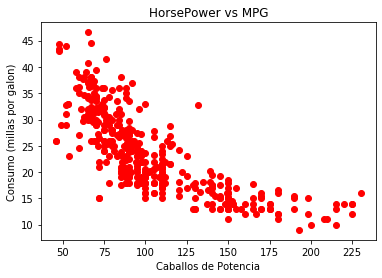

In [34]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()#borro columnas vacias
data_auto["horsepower"] = data_auto["horsepower"].dropna()#borro columnas vacias
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")#primero dato en x,y ; luego rojo y en bolitas

#pongo titulos a ejes 
plt.xlabel("Caballos de Potencia")#o horsepower
plt.ylabel("Consumo (millas por galon)")#mpg
plt.title("HorsePower vs MPG")

**Analisis:** la relacion no parece lineal, lo mas probable es asumir que tiene una tendencia exponencial o cuadratica.
Vamos a intentar ajustarlo a una relacion lineal y ver que tal se comporta.
Si vemos que no encaja habra que optar por otros modelo (cuadratico, exponencial,cubico)

## Modelo de regresion lineal

* mpg = a + b * horsepower

In [35]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())#relleno datos vacios con promedio
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())#relleno datos vacios con promedio
X_data = X[:, np.newaxis]

In [36]:
lm = LinearRegression()
lm.fit(X_data,Y) #NOTA: uso np.newaxis por que la funcion recibe datos como dataframe y NO como una columna.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Revisemos los tipos de datos:

In [37]:
type(X)

pandas.core.series.Series

In [38]:
type(X_data) #este es el aceptado por Linearregression()

numpy.ndarray

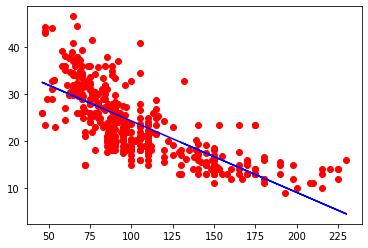

In [39]:
%matplotlib inline
plt.plot(X,Y,"ro") #estos son los puntos rojos
plt.plot(X,lm.predict(X_data), color="blue")#muestro predicciones en grafico

Parece que se ajusta (medianamente bien) a una relacion lineal

In [41]:
lm.score(X_data,Y)

0.574653340645025

El valor obtenido de R^2 no esta mal, no es el mejor pero tampoco es pesimo pues.

In [42]:
SSD= np.sum((Y-lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean

"SSD: "+ str(SSD) + "; RSE: " + str(RSE) + "; Error: " + str(error) + "; y_mean: " + str(y_mean)

'SSD: 10315.75196006092; RSE: 5.046879480825511; Error: 0.21462773361633458; y_mean: 23.51457286432162'

Estos valores no estan mal, son aceptables, pero **podemos hacerlo mejor** 

## Modelo de regresión cuadrátrico
* mpg = a + b * (horsepower)^2

In [57]:
X_data = X**2 #traigo la x de arriba donde le quito los datos nulos y la elevo al cuadrado
X_data = X_data[:,np.newaxis]#todas las filas y columas en formato soportado por numpy

In [46]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
lm.score(X_data, Y) #este valor es mas bajo que el anterior en el modelo lineal, no conviene

0.4849887034823205

In [55]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
"SSD: " + str(SSD) + " RSE: " + str(RSE) + " Y_Mean: " + str(y_mean) + " Error: " + str(error*100)

'SSD: 12490.350340501926 RSE: 5.553410772769817 Y_Mean: 23.51457286432162 Error: 23.6168898529981'

**El error son 2 puntos porcentuales mas que en el modelo lineal**

## Modelo de regresión lineal y cuadrático

* mpg = a + b horsepower + c horsepower^2

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

Vamos a utilizar un polinomio de grado 2

In [67]:
poly = PolynomialFeatures(degree=2)#polinomio de grado maximo 2 que utilizaremos

In [62]:
X_data = poly.fit_transform(X[:,np.newaxis])#hago una transformacion de los datos 

In [66]:
#cambiamos el metodo utilizado
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
lm.score(X_data,Y)

0.6439066584257467

**El R^2 obtenido es el mas grande de todos**

In [69]:
lm.intercept_ #alpha

55.02619244708116

In [70]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

El modelo quedaria asi:
    **mpg = 55.026 -0.434 hp + 0.00112615 hp^2**

Podriamos crear un modelo de un polinomio mas alto, quiza hasta 5 o 12 y probando uno a uno, **intentemos**

In [78]:
for d in range(2,12):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado "+str(d))
    print("R2:" +str(lm.score(X_data, Y)))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(X_data, Y, lm.predict(X_data))#llamo funcion
    print("---------------------------------------------")

Regresión de grado 2
R2:0.6439066584257467
55.02619244708116
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524503, RSE: 4.61778115803654, Y_mean: 23.51457286432162, error: 19.63795466190689%
---------------------------------------------
Regresión de grado 3
R2:0.6444678885560744
58.44877411167289
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855, RSE: 4.614140736300908, Y_mean: 23.51457286432162, error: 19.622473106036676%
---------------------------------------------
Regresión de grado 4
R2:0.6467674189704502
40.0966438558909
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.799832491353, RSE: 4.5991947315797574, Y_mean: 23.51457286432162, error: 19.55891250126878%
---------------------------------------------
Regresión de grado 5
R2:0.6547512491370207
-40.694028616702454
[ 0.00000000e+00  4.00021893e+00 -7.54802466e-02  6.19621640e-04
 -2.36220984e-06  3.41983153e-09]
SSD: 8373.171388777962, RSE:

In [74]:
#con esta funcion pretendo obtener todos los estadisticos que me ayudan a decidir si una prediccion esta bien o mal
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")

**Conclusion:** NO conviene usar polinomios mas grandes, los valores apenas suben unas cuantas decimas